In [19]:
## Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Read data from device agnostic source
data = pd.read_csv("https://raw.githubusercontent.com/SeanHGorman/DataScienceMentorship/main/Land%20Well%202_Laurel-01_Log%20Query_Sheet1.csv")

In [21]:
# Assign empty values to newly created column
# This column will calculate the difference in depth drilled by row
data["Difference DMEA(m)"] = 0.0

In [22]:
#Check to make sure the row was correctly created
data.head()

DATETIME  DBTM (m)  DMEA (m)  MFIA (L/min)  RPMA (rpm)  \
0  2010-06-27T17:42:58Z   2678.15   2679.57     1331.0526           0   
1  2010-06-27T17:43:03Z   2678.54   2679.57     1330.7759           0   
2  2010-06-27T17:43:08Z   2654.21   2677.26      888.0000          17   
3  2010-06-27T17:43:13Z   2654.22   2677.26      887.7489          17   
4  2010-06-27T17:43:18Z   2654.21   2677.26      887.7489          17   

   SPPA (bar)  WOBA (ton)  Difference DMEA(m)  
0        67.6      -14.20                 0.0  
1        67.4      -13.35                 0.0  
2        12.3       -0.91                 0.0  
3        19.4        0.26                 0.0  
4        24.9        1.12                 0.0

In [23]:
#Quality check
data.describe()


DBTM (m)     DMEA (m)  MFIA (L/min)   RPMA (rpm)   SPPA (bar)  \
count  4525.000000  4525.000000   4525.000000  4525.000000  4525.000000   
mean   2730.668387  2733.341737   1242.399969    93.470497    66.798055   
std      32.797164    33.567461    320.630858    31.435988    17.136946   
min    2653.560000  2677.260000      0.000000     0.000000     2.600000   
25%    2704.540000  2704.740000   1234.346900    81.000000    65.100000   
50%    2736.970000  2741.240000   1330.775900   110.000000    69.500000   
75%    2757.140000  2760.950000   1331.052600   110.000000    75.700000   
max    2784.880000  2784.880000   1524.533200   115.000000    90.600000   

        WOBA (ton)  Difference DMEA(m)  
count  4525.000000              4525.0  
mean      7.665726                 0.0  
std       6.093362                 0.0  
min     -14.320000                 0.0  
25%       5.110000                 0.0  
50%       7.720000                 0.0  
75%      10.330000                 0.0  
max      91.780000                 0.0

In [24]:
# Check data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATETIME            4525 non-null   object 
 1   DBTM (m)            4525 non-null   float64
 2   DMEA (m)            4525 non-null   float64
 3   MFIA (L/min)        4525 non-null   float64
 4   RPMA (rpm)          4525 non-null   int64  
 5   SPPA (bar)          4525 non-null   float64
 6   WOBA (ton)          4525 non-null   float64
 7   Difference DMEA(m)  4525 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 282.9+ KB
None


In [25]:
# Set the starting bit depth to represent depth in first row
starting_Bit_Depth = data["DMEA (m)"].iloc[0]

In [26]:
# Check to ensure starting depth is correct
print(starting_Bit_Depth)

2679.57


In [27]:
depth_drilled = 0
##iteration
a = 0
#Where i is current depth drilled
for i in data["DMEA (m)"]:

# If the starting depth is the same (i.e. has not moved), skip and add to iterator
    if i == data["DMEA (m)"].loc[0]:
        #print("passing")
        a = a + 1
        pass
    else:
        
# Calculate the difference in depth by subtracting previous row's value from current row
        difference_depth = (i - data["DMEA (m)"].loc[a-1])
        data["Difference DMEA(m)"].loc[a] = difference_depth
        a = a + 1

passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing
passing


C:\Users\seanh\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [28]:
# Incrase the number of rows we can see in data.head
# This allows us to review in greater depth 
pd.set_option('display.max_rows', 1000)

# Review data to look for anomalies
data.head(20)

DATETIME  DBTM (m)  DMEA (m)  MFIA (L/min)  RPMA (rpm)  \
0    2010-06-27T17:42:58Z   2678.15   2679.57     1331.0526           0   
1    2010-06-27T17:43:03Z   2678.54   2679.57     1330.7759           0   
2    2010-06-27T17:43:08Z   2654.21   2677.26      888.0000          17   
3    2010-06-27T17:43:13Z   2654.22   2677.26      887.7489          17   
4    2010-06-27T17:43:18Z   2654.21   2677.26      887.7489          17   
5    2010-06-27T17:43:23Z   2654.21   2677.26      887.5759          17   
6    2010-06-27T17:43:28Z   2654.21   2677.26      888.0947          17   
7    2010-06-27T17:43:33Z   2654.21   2677.26     1043.6678          17   
8    2010-06-27T17:43:38Z   2654.21   2677.26     1089.9109          17   
9    2010-06-27T17:43:43Z   2654.21   2677.26     1146.3571          17   
10   2010-06-27T17:43:48Z   2654.21   2677.26     1157.7017          17   
11   2010-06-27T17:43:53Z   2653.57   2677.26     1138.2637          17   
12   2010-06-27T17:43:58Z   2653.56   2677.26     1138.2637          17   
13   2010-06-27T17:44:03Z   2653.57   2677.26     1138.2637          17   
14   2010-06-27T17:44:08Z   2653.57   2677.26     1138.0562          17   
15   2010-06-27T17:44:13Z   2653.64   2677.26     1138.2637          17   
16   2010-06-27T17:44:18Z   2653.83   2677.26     1138.2637          17   
17   2010-06-27T17:44:23Z   2654.09   2677.26     1138.2637          17   
18   2010-06-27T17:44:28Z   2654.25   2677.26     1138.2637          17   
19   2010-06-27T17:44:33Z   2654.54   2677.26     1138.0562          17   
20   2010-06-27T17:44:38Z   2654.71   2677.26     1138.2637          17   
21   2010-06-27T17:44:43Z   2654.94   2677.26     1138.2637          17   
22   2010-06-27T17:44:48Z   2655.10   2677.26     1138.0562          17   
23   2010-06-27T17:44:53Z   2655.38   2677.26     1138.0562          17   
24   2010-06-27T17:44:58Z   2655.57   2677.26     1138.2637          17   
25   2010-06-27T17:45:03Z   2655.83   2677.26     1138.0562          17   
26   2010-06-27T17:45:08Z   2656.03   2677.26     1138.2637          17   
27   2010-06-27T17:45:13Z   2656.29   2677.26     1138.4713          17   
28   2010-06-27T17:45:18Z   2656.47   2677.26     1138.4713          17   
29   2010-06-27T17:45:23Z   2656.78   2677.26     1138.2637          17   
30   2010-06-27T17:45:28Z   2656.97   2677.26     1138.2637          17   
31   2010-06-27T17:45:33Z   2657.27   2677.26     1138.0562          17   
32   2010-06-27T17:45:38Z   2657.46   2677.26     1138.2637          17   
33   2010-06-27T17:45:43Z   2657.82   2677.26     1138.2637          17   
34   2010-06-27T17:45:48Z   2658.06   2677.26     1138.2637          17   
35   2010-06-27T17:45:53Z   2658.46   2677.26     1138.2637          17   
36   2010-06-27T17:45:58Z   2658.74   2677.26     1138.0562          17   
37   2010-06-27T17:46:03Z   2659.14   2677.26     1138.2637          17   
38   2010-06-27T17:46:08Z   2659.46   2677.26     1138.2637          17   
39   2010-06-27T17:46:13Z   2659.95   2677.26     1138.2637          17   
40   2010-06-27T17:46:18Z   2660.27   2677.26     1138.2637          17   
41   2010-06-27T17:46:23Z   2660.72   2677.26     1138.2637          17   
42   2010-06-27T17:46:28Z   2661.04   2677.26     1138.2637          17   
43   2010-06-27T17:46:33Z   2661.48   2677.26     1138.2637          17   
44   2010-06-27T17:46:38Z   2661.81   2677.26     1138.0562          17   
45   2010-06-27T17:46:43Z   2662.26   2677.26     1138.2637          17   
46   2010-06-27T17:46:48Z   2662.56   2677.26     1138.0562          17   
47   2010-06-27T17:46:53Z   2663.03   2677.26     1138.0562          17   
48   2010-06-27T17:46:58Z   2663.35   2677.26     1138.2637          17   
49   2010-06-27T17:47:03Z   2663.79   2677.26     1138.2637          17   
50   2010-06-27T17:47:08Z   2664.10   2677.26     1138.2637          17   
51   2010-06-27T17:47:13Z   2664.53   2677.26     1138.2637          17   
52   2010-06-27T17:47:18Z   2664.81   2677

In [29]:
# Create column to determine time that has passed
data["Time Elapsed"] = 0


In [30]:
# View dataset to ensure column create properly
data.head(20)

DATETIME  DBTM (m)  DMEA (m)  MFIA (L/min)  RPMA (rpm)  \
0    2010-06-27T17:42:58Z   2678.15   2679.57     1331.0526           0   
1    2010-06-27T17:43:03Z   2678.54   2679.57     1330.7759           0   
2    2010-06-27T17:43:08Z   2654.21   2677.26      888.0000          17   
3    2010-06-27T17:43:13Z   2654.22   2677.26      887.7489          17   
4    2010-06-27T17:43:18Z   2654.21   2677.26      887.7489          17   
5    2010-06-27T17:43:23Z   2654.21   2677.26      887.5759          17   
6    2010-06-27T17:43:28Z   2654.21   2677.26      888.0947          17   
7    2010-06-27T17:43:33Z   2654.21   2677.26     1043.6678          17   
8    2010-06-27T17:43:38Z   2654.21   2677.26     1089.9109          17   
9    2010-06-27T17:43:43Z   2654.21   2677.26     1146.3571          17   
10   2010-06-27T17:43:48Z   2654.21   2677.26     1157.7017          17   
11   2010-06-27T17:43:53Z   2653.57   2677.26     1138.2637          17   
12   2010-06-27T17:43:58Z   2653.56   2677.26     1138.2637          17   
13   2010-06-27T17:44:03Z   2653.57   2677.26     1138.2637          17   
14   2010-06-27T17:44:08Z   2653.57   2677.26     1138.0562          17   
15   2010-06-27T17:44:13Z   2653.64   2677.26     1138.2637          17   
16   2010-06-27T17:44:18Z   2653.83   2677.26     1138.2637          17   
17   2010-06-27T17:44:23Z   2654.09   2677.26     1138.2637          17   
18   2010-06-27T17:44:28Z   2654.25   2677.26     1138.2637          17   
19   2010-06-27T17:44:33Z   2654.54   2677.26     1138.0562          17   
20   2010-06-27T17:44:38Z   2654.71   2677.26     1138.2637          17   
21   2010-06-27T17:44:43Z   2654.94   2677.26     1138.2637          17   
22   2010-06-27T17:44:48Z   2655.10   2677.26     1138.0562          17   
23   2010-06-27T17:44:53Z   2655.38   2677.26     1138.0562          17   
24   2010-06-27T17:44:58Z   2655.57   2677.26     1138.2637          17   
25   2010-06-27T17:45:03Z   2655.83   2677.26     1138.0562          17   
26   2010-06-27T17:45:08Z   2656.03   2677.26     1138.2637          17   
27   2010-06-27T17:45:13Z   2656.29   2677.26     1138.4713          17   
28   2010-06-27T17:45:18Z   2656.47   2677.26     1138.4713          17   
29   2010-06-27T17:45:23Z   2656.78   2677.26     1138.2637          17   
30   2010-06-27T17:45:28Z   2656.97   2677.26     1138.2637          17   
31   2010-06-27T17:45:33Z   2657.27   2677.26     1138.0562          17   
32   2010-06-27T17:45:38Z   2657.46   2677.26     1138.2637          17   
33   2010-06-27T17:45:43Z   2657.82   2677.26     1138.2637          17   
34   2010-06-27T17:45:48Z   2658.06   2677.26     1138.2637          17   
35   2010-06-27T17:45:53Z   2658.46   2677.26     1138.2637          17   
36   2010-06-27T17:45:58Z   2658.74   2677.26     1138.0562          17   
37   2010-06-27T17:46:03Z   2659.14   2677.26     1138.2637          17   
38   2010-06-27T17:46:08Z   2659.46   2677.26     1138.2637          17   
39   2010-06-27T17:46:13Z   2659.95   2677.26     1138.2637          17   
40   2010-06-27T17:46:18Z   2660.27   2677.26     1138.2637          17   
41   2010-06-27T17:46:23Z   2660.72   2677.26     1138.2637          17   
42   2010-06-27T17:46:28Z   2661.04   2677.26     1138.2637          17   
43   2010-06-27T17:46:33Z   2661.48   2677.26     1138.2637          17   
44   2010-06-27T17:46:38Z   2661.81   2677.26     1138.0562          17   
45   2010-06-27T17:46:43Z   2662.26   2677.26     1138.2637          17   
46   2010-06-27T17:46:48Z   2662.56   2677.26     1138.0562          17   
47   2010-06-27T17:46:53Z   2663.03   2677.26     1138.0562          17   
48   2010-06-27T17:46:58Z   2663.35   2677.26     1138.2637          17   
49   2010-06-27T17:47:03Z   2663.79   2677.26     1138.2637          17   
50   2010-06-27T17:47:08Z   2664.10   2677.26     1138.2637          17   
51   2010-06-27T17:47:13Z   2664.53   2677.26     1138.2637          17   
52   2010-06-27T17:47:18Z   2664.81   2677

In [31]:
#Set n as iteration
n = 0
# We know the amount of time between each measurement is 5s
time = 5

for i in data["Time Elapsed"]:
# If we're looking at the first row, pass and add to iterator
    if n == 0:
        n = n + 1
        pass
    
    else:
# For each 5s, add to the iterator
        data["Time Elapsed"].loc[n] = (data["Time Elapsed"].loc[n-1] + 5)
        n = n + 1
        

C:\Users\seanh\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [32]:
# Quality check to ensure that data has been entered correctly
data.head(20)

DATETIME  DBTM (m)  DMEA (m)  MFIA (L/min)  RPMA (rpm)  \
0    2010-06-27T17:42:58Z   2678.15   2679.57     1331.0526           0   
1    2010-06-27T17:43:03Z   2678.54   2679.57     1330.7759           0   
2    2010-06-27T17:43:08Z   2654.21   2677.26      888.0000          17   
3    2010-06-27T17:43:13Z   2654.22   2677.26      887.7489          17   
4    2010-06-27T17:43:18Z   2654.21   2677.26      887.7489          17   
5    2010-06-27T17:43:23Z   2654.21   2677.26      887.5759          17   
6    2010-06-27T17:43:28Z   2654.21   2677.26      888.0947          17   
7    2010-06-27T17:43:33Z   2654.21   2677.26     1043.6678          17   
8    2010-06-27T17:43:38Z   2654.21   2677.26     1089.9109          17   
9    2010-06-27T17:43:43Z   2654.21   2677.26     1146.3571          17   
10   2010-06-27T17:43:48Z   2654.21   2677.26     1157.7017          17   
11   2010-06-27T17:43:53Z   2653.57   2677.26     1138.2637          17   
12   2010-06-27T17:43:58Z   2653.56   2677.26     1138.2637          17   
13   2010-06-27T17:44:03Z   2653.57   2677.26     1138.2637          17   
14   2010-06-27T17:44:08Z   2653.57   2677.26     1138.0562          17   
15   2010-06-27T17:44:13Z   2653.64   2677.26     1138.2637          17   
16   2010-06-27T17:44:18Z   2653.83   2677.26     1138.2637          17   
17   2010-06-27T17:44:23Z   2654.09   2677.26     1138.2637          17   
18   2010-06-27T17:44:28Z   2654.25   2677.26     1138.2637          17   
19   2010-06-27T17:44:33Z   2654.54   2677.26     1138.0562          17   
20   2010-06-27T17:44:38Z   2654.71   2677.26     1138.2637          17   
21   2010-06-27T17:44:43Z   2654.94   2677.26     1138.2637          17   
22   2010-06-27T17:44:48Z   2655.10   2677.26     1138.0562          17   
23   2010-06-27T17:44:53Z   2655.38   2677.26     1138.0562          17   
24   2010-06-27T17:44:58Z   2655.57   2677.26     1138.2637          17   
25   2010-06-27T17:45:03Z   2655.83   2677.26     1138.0562          17   
26   2010-06-27T17:45:08Z   2656.03   2677.26     1138.2637          17   
27   2010-06-27T17:45:13Z   2656.29   2677.26     1138.4713          17   
28   2010-06-27T17:45:18Z   2656.47   2677.26     1138.4713          17   
29   2010-06-27T17:45:23Z   2656.78   2677.26     1138.2637          17   
30   2010-06-27T17:45:28Z   2656.97   2677.26     1138.2637          17   
31   2010-06-27T17:45:33Z   2657.27   2677.26     1138.0562          17   
32   2010-06-27T17:45:38Z   2657.46   2677.26     1138.2637          17   
33   2010-06-27T17:45:43Z   2657.82   2677.26     1138.2637          17   
34   2010-06-27T17:45:48Z   2658.06   2677.26     1138.2637          17   
35   2010-06-27T17:45:53Z   2658.46   2677.26     1138.2637          17   
36   2010-06-27T17:45:58Z   2658.74   2677.26     1138.0562          17   
37   2010-06-27T17:46:03Z   2659.14   2677.26     1138.2637          17   
38   2010-06-27T17:46:08Z   2659.46   2677.26     1138.2637          17   
39   2010-06-27T17:46:13Z   2659.95   2677.26     1138.2637          17   
40   2010-06-27T17:46:18Z   2660.27   2677.26     1138.2637          17   
41   2010-06-27T17:46:23Z   2660.72   2677.26     1138.2637          17   
42   2010-06-27T17:46:28Z   2661.04   2677.26     1138.2637          17   
43   2010-06-27T17:46:33Z   2661.48   2677.26     1138.2637          17   
44   2010-06-27T17:46:38Z   2661.81   2677.26     1138.0562          17   
45   2010-06-27T17:46:43Z   2662.26   2677.26     1138.2637          17   
46   2010-06-27T17:46:48Z   2662.56   2677.26     1138.0562          17   
47   2010-06-27T17:46:53Z   2663.03   2677.26     1138.0562          17   
48   2010-06-27T17:46:58Z   2663.35   2677.26     1138.2637          17   
49   2010-06-27T17:47:03Z   2663.79   2677.26     1138.2637          17   
50   2010-06-27T17:47:08Z   2664.10   2677.26     1138.2637          17   
51   2010-06-27T17:47:13Z   2664.53   2677.26     1138.2637          17   
52   2010-06-27T17:47:18Z   2664.81   2677

In [33]:
#Create a column to calculate the depth drilled per min 
data["Depth Drilled per Min"] = 0
k = 0
depth = 0
for i in data["Time Elapsed"]:
#If the value is visible by 60 (equal to 1 min), add up last 10 values for Difference DMEA(m)
    if i%60 == 0:
        depth = 0
        for i in range (1,11):
            depth = depth + data["Difference DMEA(m)"].loc[k]
            #print(depth)
        k = k + 1
        data["Depth Drilled per Min"].loc[k] = depth
# Otherwise, add to iterator
    else: 
        k = k+1
        #print("0")
        

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0


C:\Users\seanh\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.01999999999998181
0.03999999999996362
0.05999999999994543
0.07999999999992724
0.09999999999990905
0.11999999999989086
0.13999999999987267
0.15999999999985448
0.1799999999998363
0.1999999999998181
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.

In [34]:
#Quality check to ensure values are correct
data.head(20)

DATETIME  DBTM (m)  DMEA (m)  MFIA (L/min)  RPMA (rpm)  \
0    2010-06-27T17:42:58Z   2678.15   2679.57     1331.0526           0   
1    2010-06-27T17:43:03Z   2678.54   2679.57     1330.7759           0   
2    2010-06-27T17:43:08Z   2654.21   2677.26      888.0000          17   
3    2010-06-27T17:43:13Z   2654.22   2677.26      887.7489          17   
4    2010-06-27T17:43:18Z   2654.21   2677.26      887.7489          17   
5    2010-06-27T17:43:23Z   2654.21   2677.26      887.5759          17   
6    2010-06-27T17:43:28Z   2654.21   2677.26      888.0947          17   
7    2010-06-27T17:43:33Z   2654.21   2677.26     1043.6678          17   
8    2010-06-27T17:43:38Z   2654.21   2677.26     1089.9109          17   
9    2010-06-27T17:43:43Z   2654.21   2677.26     1146.3571          17   
10   2010-06-27T17:43:48Z   2654.21   2677.26     1157.7017          17   
11   2010-06-27T17:43:53Z   2653.57   2677.26     1138.2637          17   
12   2010-06-27T17:43:58Z   2653.56   2677.26     1138.2637          17   
13   2010-06-27T17:44:03Z   2653.57   2677.26     1138.2637          17   
14   2010-06-27T17:44:08Z   2653.57   2677.26     1138.0562          17   
15   2010-06-27T17:44:13Z   2653.64   2677.26     1138.2637          17   
16   2010-06-27T17:44:18Z   2653.83   2677.26     1138.2637          17   
17   2010-06-27T17:44:23Z   2654.09   2677.26     1138.2637          17   
18   2010-06-27T17:44:28Z   2654.25   2677.26     1138.2637          17   
19   2010-06-27T17:44:33Z   2654.54   2677.26     1138.0562          17   
20   2010-06-27T17:44:38Z   2654.71   2677.26     1138.2637          17   
21   2010-06-27T17:44:43Z   2654.94   2677.26     1138.2637          17   
22   2010-06-27T17:44:48Z   2655.10   2677.26     1138.0562          17   
23   2010-06-27T17:44:53Z   2655.38   2677.26     1138.0562          17   
24   2010-06-27T17:44:58Z   2655.57   2677.26     1138.2637          17   
25   2010-06-27T17:45:03Z   2655.83   2677.26     1138.0562          17   
26   2010-06-27T17:45:08Z   2656.03   2677.26     1138.2637          17   
27   2010-06-27T17:45:13Z   2656.29   2677.26     1138.4713          17   
28   2010-06-27T17:45:18Z   2656.47   2677.26     1138.4713          17   
29   2010-06-27T17:45:23Z   2656.78   2677.26     1138.2637          17   
30   2010-06-27T17:45:28Z   2656.97   2677.26     1138.2637          17   
31   2010-06-27T17:45:33Z   2657.27   2677.26     1138.0562          17   
32   2010-06-27T17:45:38Z   2657.46   2677.26     1138.2637          17   
33   2010-06-27T17:45:43Z   2657.82   2677.26     1138.2637          17   
34   2010-06-27T17:45:48Z   2658.06   2677.26     1138.2637          17   
35   2010-06-27T17:45:53Z   2658.46   2677.26     1138.2637          17   
36   2010-06-27T17:45:58Z   2658.74   2677.26     1138.0562          17   
37   2010-06-27T17:46:03Z   2659.14   2677.26     1138.2637          17   
38   2010-06-27T17:46:08Z   2659.46   2677.26     1138.2637          17   
39   2010-06-27T17:46:13Z   2659.95   2677.26     1138.2637          17   
40   2010-06-27T17:46:18Z   2660.27   2677.26     1138.2637          17   
41   2010-06-27T17:46:23Z   2660.72   2677.26     1138.2637          17   
42   2010-06-27T17:46:28Z   2661.04   2677.26     1138.2637          17   
43   2010-06-27T17:46:33Z   2661.48   2677.26     1138.2637          17   
44   2010-06-27T17:46:38Z   2661.81   2677.26     1138.0562          17   
45   2010-06-27T17:46:43Z   2662.26   2677.26     1138.2637          17   
46   2010-06-27T17:46:48Z   2662.56   2677.26     1138.0562          17   
47   2010-06-27T17:46:53Z   2663.03   2677.26     1138.0562          17   
48   2010-06-27T17:46:58Z   2663.35   2677.26     1138.2637          17   
49   2010-06-27T17:47:03Z   2663.79   2677.26     1138.2637          17   
50   2010-06-27T17:47:08Z   2664.10   2677.26     1138.2637          17   
51   2010-06-27T17:47:13Z   2664.53   2677.26     1138.2637          17   
52   2010-06-27T17:47:18Z   2664.81   2677

<AxesSubplot:xlabel='Time Elapsed'>

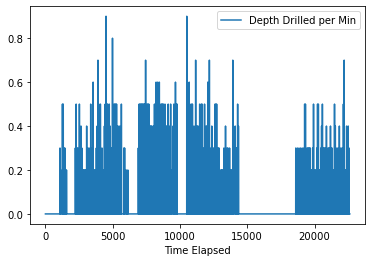

In [35]:
data.plot(x='Time Elapsed', y='Depth Drilled per Min')

In [36]:
data["Meters Drilled"] = 0

In [37]:
#data.head(10)
#pd.options.mode.chained_assignment = None  # default='warn'
## Set iteration
#k = 0 
#for i in data["Meters Drilled"]:
#    if k == 0:
#        print("pass")
#        pass
#        k = (k + 1)
#    else:
#        data["Meters Drilled"].loc[k] = data["Difference DMEA(m)"].loc[k]+data["Meters Drilled"].loc[k]
#        k = (k + 1)


In [38]:
data.head(1000)

DATETIME  DBTM (m)  DMEA (m)  MFIA (L/min)  RPMA (rpm)  \
0    2010-06-27T17:42:58Z   2678.15   2679.57     1331.0526           0   
1    2010-06-27T17:43:03Z   2678.54   2679.57     1330.7759           0   
2    2010-06-27T17:43:08Z   2654.21   2677.26      888.0000          17   
3    2010-06-27T17:43:13Z   2654.22   2677.26      887.7489          17   
4    2010-06-27T17:43:18Z   2654.21   2677.26      887.7489          17   
5    2010-06-27T17:43:23Z   2654.21   2677.26      887.5759          17   
6    2010-06-27T17:43:28Z   2654.21   2677.26      888.0947          17   
7    2010-06-27T17:43:33Z   2654.21   2677.26     1043.6678          17   
8    2010-06-27T17:43:38Z   2654.21   2677.26     1089.9109          17   
9    2010-06-27T17:43:43Z   2654.21   2677.26     1146.3571          17   
10   2010-06-27T17:43:48Z   2654.21   2677.26     1157.7017          17   
11   2010-06-27T17:43:53Z   2653.57   2677.26     1138.2637          17   
12   2010-06-27T17:43:58Z   2653.56   2677.26     1138.2637          17   
13   2010-06-27T17:44:03Z   2653.57   2677.26     1138.2637          17   
14   2010-06-27T17:44:08Z   2653.57   2677.26     1138.0562          17   
15   2010-06-27T17:44:13Z   2653.64   2677.26     1138.2637          17   
16   2010-06-27T17:44:18Z   2653.83   2677.26     1138.2637          17   
17   2010-06-27T17:44:23Z   2654.09   2677.26     1138.2637          17   
18   2010-06-27T17:44:28Z   2654.25   2677.26     1138.2637          17   
19   2010-06-27T17:44:33Z   2654.54   2677.26     1138.0562          17   
20   2010-06-27T17:44:38Z   2654.71   2677.26     1138.2637          17   
21   2010-06-27T17:44:43Z   2654.94   2677.26     1138.2637          17   
22   2010-06-27T17:44:48Z   2655.10   2677.26     1138.0562          17   
23   2010-06-27T17:44:53Z   2655.38   2677.26     1138.0562          17   
24   2010-06-27T17:44:58Z   2655.57   2677.26     1138.2637          17   
25   2010-06-27T17:45:03Z   2655.83   2677.26     1138.0562          17   
26   2010-06-27T17:45:08Z   2656.03   2677.26     1138.2637          17   
27   2010-06-27T17:45:13Z   2656.29   2677.26     1138.4713          17   
28   2010-06-27T17:45:18Z   2656.47   2677.26     1138.4713          17   
29   2010-06-27T17:45:23Z   2656.78   2677.26     1138.2637          17   
30   2010-06-27T17:45:28Z   2656.97   2677.26     1138.2637          17   
31   2010-06-27T17:45:33Z   2657.27   2677.26     1138.0562          17   
32   2010-06-27T17:45:38Z   2657.46   2677.26     1138.2637          17   
33   2010-06-27T17:45:43Z   2657.82   2677.26     1138.2637          17   
34   2010-06-27T17:45:48Z   2658.06   2677.26     1138.2637          17   
35   2010-06-27T17:45:53Z   2658.46   2677.26     1138.2637          17   
36   2010-06-27T17:45:58Z   2658.74   2677.26     1138.0562          17   
37   2010-06-27T17:46:03Z   2659.14   2677.26     1138.2637          17   
38   2010-06-27T17:46:08Z   2659.46   2677.26     1138.2637          17   
39   2010-06-27T17:46:13Z   2659.95   2677.26     1138.2637          17   
40   2010-06-27T17:46:18Z   2660.27   2677.26     1138.2637          17   
41   2010-06-27T17:46:23Z   2660.72   2677.26     1138.2637          17   
42   2010-06-27T17:46:28Z   2661.04   2677.26     1138.2637          17   
43   2010-06-27T17:46:33Z   2661.48   2677.26     1138.2637          17   
44   2010-06-27T17:46:38Z   2661.81   2677.26     1138.0562          17   
45   2010-06-27T17:46:43Z   2662.26   2677.26     1138.2637          17   
46   2010-06-27T17:46:48Z   2662.56   2677.26     1138.0562          17   
47   2010-06-27T17:46:53Z   2663.03   2677.26     1138.0562          17   
48   2010-06-27T17:46:58Z   2663.35   2677.26     1138.2637          17   
49   2010-06-27T17:47:03Z   2663.79   2677.26     1138.2637          17   
50   2010-06-27T17:47:08Z   2664.10   2677.26     1138.2637          17   
51   2010-06-27T17:47:13Z   2664.53   2677.26     1138.2637          17   
52   2010-06-27T17:47:18Z   2664.81   2677

In [39]:
k = 0
depth = 0
empty_array = []
data["Meters Drilled"] = 0
for i in data["Meters Drilled"]:
    if k == 0:
        print("First iteration, pass")
        pass
        k = k+1
    else:
        print("This is row number")
        print(k)
        print("This is the new value that will be assigned/replaced")
        print(data["Meters Drilled"].loc[k])
        if data["Difference DMEA(m)"].loc[k] < 0:
            data["Difference DMEA(m)"].loc[k] = 0
        data["Meters Drilled"].loc[k] = data["Meters Drilled"].loc[k-1] + data["Difference DMEA(m)"].loc[k]
        print("This is the new assigned value")
        print(data["Meters Drilled"].loc[k])
        print ("Success")
        k = k + 1
        
data.head(1000)
        

First iteration, pass
This is row number
1
This is the new value that will be assigned/replaced
0
This is the new assigned value
0.0
Success
This is row number
2
This is the new value that will be assigned/replaced
0.0
This is the new assigned value
0.0
Success
This is row number
3
This is the new value that will be assigned/replaced
0.0
This is the new assigned value
0.0
Success
This is row number
4
This is the new value that will be assigned/replaced
0.0
This is the new assigned value
0.0
Success
This is row number
5
This is the new value that will be assigned/replaced
0.0
This is the new assigned value
0.0
Success
This is row number
6
This is the new value that will be assigned/replaced
0.0
This is the new assigned value
0.0
Success
This is row number
7
This is the new value that will be assigned/replaced
0.0
This is the new assigned value
0.0
Success
This is row number
8
This is the new value that will be assigned/replaced
0.0
This is the new assigned value
0.0
Success
This is row 

C:\Users\seanh\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)



1.7299999999995634
Success
This is row number
289
This is the new value that will be assigned/replaced
0.0
This is the new assigned value
1.7699999999999818
Success
This is row number
290
This is the new value that will be assigned/replaced
0.0
This is the new assigned value
1.7899999999999636
Success
This is row number
291
This is the new value that will be assigned/replaced
0.0
This is the new assigned value
1.8099999999999454
Success
This is row number
292
This is the new value that will be assigned/replaced
0.0
This is the new assigned value
1.8399999999996908
Success
This is row number
293
This is the new value that will be assigned/replaced
0.0
This is the new assigned value
1.8699999999998909
Success
This is row number
294
This is the new value that will be assigned/replaced
0.0
This is the new assigned value
1.9099999999998545
Success
This is row number
295
This is the new value that will be assigned/replaced
0.0
This is the new assigned value
1.9299999999998363
Success
This i

DATETIME  DBTM (m)  DMEA (m)  MFIA (L/min)  RPMA (rpm)  \
0    2010-06-27T17:42:58Z   2678.15   2679.57     1331.0526           0   
1    2010-06-27T17:43:03Z   2678.54   2679.57     1330.7759           0   
2    2010-06-27T17:43:08Z   2654.21   2677.26      888.0000          17   
3    2010-06-27T17:43:13Z   2654.22   2677.26      887.7489          17   
4    2010-06-27T17:43:18Z   2654.21   2677.26      887.7489          17   
5    2010-06-27T17:43:23Z   2654.21   2677.26      887.5759          17   
6    2010-06-27T17:43:28Z   2654.21   2677.26      888.0947          17   
7    2010-06-27T17:43:33Z   2654.21   2677.26     1043.6678          17   
8    2010-06-27T17:43:38Z   2654.21   2677.26     1089.9109          17   
9    2010-06-27T17:43:43Z   2654.21   2677.26     1146.3571          17   
10   2010-06-27T17:43:48Z   2654.21   2677.26     1157.7017          17   
11   2010-06-27T17:43:53Z   2653.57   2677.26     1138.2637          17   
12   2010-06-27T17:43:58Z   2653.56   2677.26     1138.2637          17   
13   2010-06-27T17:44:03Z   2653.57   2677.26     1138.2637          17   
14   2010-06-27T17:44:08Z   2653.57   2677.26     1138.0562          17   
15   2010-06-27T17:44:13Z   2653.64   2677.26     1138.2637          17   
16   2010-06-27T17:44:18Z   2653.83   2677.26     1138.2637          17   
17   2010-06-27T17:44:23Z   2654.09   2677.26     1138.2637          17   
18   2010-06-27T17:44:28Z   2654.25   2677.26     1138.2637          17   
19   2010-06-27T17:44:33Z   2654.54   2677.26     1138.0562          17   
20   2010-06-27T17:44:38Z   2654.71   2677.26     1138.2637          17   
21   2010-06-27T17:44:43Z   2654.94   2677.26     1138.2637          17   
22   2010-06-27T17:44:48Z   2655.10   2677.26     1138.0562          17   
23   2010-06-27T17:44:53Z   2655.38   2677.26     1138.0562          17   
24   2010-06-27T17:44:58Z   2655.57   2677.26     1138.2637          17   
25   2010-06-27T17:45:03Z   2655.83   2677.26     1138.0562          17   
26   2010-06-27T17:45:08Z   2656.03   2677.26     1138.2637          17   
27   2010-06-27T17:45:13Z   2656.29   2677.26     1138.4713          17   
28   2010-06-27T17:45:18Z   2656.47   2677.26     1138.4713          17   
29   2010-06-27T17:45:23Z   2656.78   2677.26     1138.2637          17   
30   2010-06-27T17:45:28Z   2656.97   2677.26     1138.2637          17   
31   2010-06-27T17:45:33Z   2657.27   2677.26     1138.0562          17   
32   2010-06-27T17:45:38Z   2657.46   2677.26     1138.2637          17   
33   2010-06-27T17:45:43Z   2657.82   2677.26     1138.2637          17   
34   2010-06-27T17:45:48Z   2658.06   2677.26     1138.2637          17   
35   2010-06-27T17:45:53Z   2658.46   2677.26     1138.2637          17   
36   2010-06-27T17:45:58Z   2658.74   2677.26     1138.0562          17   
37   2010-06-27T17:46:03Z   2659.14   2677.26     1138.2637          17   
38   2010-06-27T17:46:08Z   2659.46   2677.26     1138.2637          17   
39   2010-06-27T17:46:13Z   2659.95   2677.26     1138.2637          17   
40   2010-06-27T17:46:18Z   2660.27   2677.26     1138.2637          17   
41   2010-06-27T17:46:23Z   2660.72   2677.26     1138.2637          17   
42   2010-06-27T17:46:28Z   2661.04   2677.26     1138.2637          17   
43   2010-06-27T17:46:33Z   2661.48   2677.26     1138.2637          17   
44   2010-06-27T17:46:38Z   2661.81   2677.26     1138.0562          17   
45   2010-06-27T17:46:43Z   2662.26   2677.26     1138.2637          17   
46   2010-06-27T17:46:48Z   2662.56   2677.26     1138.0562          17   
47   2010-06-27T17:46:53Z   2663.03   2677.26     1138.0562          17   
48   2010-06-27T17:46:58Z   2663.35   2677.26     1138.2637          17   
49   2010-06-27T17:47:03Z   2663.79   2677.26     1138.2637          17   
50   2010-06-27T17:47:08Z   2664.10   2677.26     1138.2637          17   
51   2010-06-27T17:47:13Z   2664.53   2677.26     1138.2637          17   
52   2010-06-27T17:47:18Z   2664.81   2677

In [40]:
data.head(1000)

DATETIME  DBTM (m)  DMEA (m)  MFIA (L/min)  RPMA (rpm)  \
0    2010-06-27T17:42:58Z   2678.15   2679.57     1331.0526           0   
1    2010-06-27T17:43:03Z   2678.54   2679.57     1330.7759           0   
2    2010-06-27T17:43:08Z   2654.21   2677.26      888.0000          17   
3    2010-06-27T17:43:13Z   2654.22   2677.26      887.7489          17   
4    2010-06-27T17:43:18Z   2654.21   2677.26      887.7489          17   
5    2010-06-27T17:43:23Z   2654.21   2677.26      887.5759          17   
6    2010-06-27T17:43:28Z   2654.21   2677.26      888.0947          17   
7    2010-06-27T17:43:33Z   2654.21   2677.26     1043.6678          17   
8    2010-06-27T17:43:38Z   2654.21   2677.26     1089.9109          17   
9    2010-06-27T17:43:43Z   2654.21   2677.26     1146.3571          17   
10   2010-06-27T17:43:48Z   2654.21   2677.26     1157.7017          17   
11   2010-06-27T17:43:53Z   2653.57   2677.26     1138.2637          17   
12   2010-06-27T17:43:58Z   2653.56   2677.26     1138.2637          17   
13   2010-06-27T17:44:03Z   2653.57   2677.26     1138.2637          17   
14   2010-06-27T17:44:08Z   2653.57   2677.26     1138.0562          17   
15   2010-06-27T17:44:13Z   2653.64   2677.26     1138.2637          17   
16   2010-06-27T17:44:18Z   2653.83   2677.26     1138.2637          17   
17   2010-06-27T17:44:23Z   2654.09   2677.26     1138.2637          17   
18   2010-06-27T17:44:28Z   2654.25   2677.26     1138.2637          17   
19   2010-06-27T17:44:33Z   2654.54   2677.26     1138.0562          17   
20   2010-06-27T17:44:38Z   2654.71   2677.26     1138.2637          17   
21   2010-06-27T17:44:43Z   2654.94   2677.26     1138.2637          17   
22   2010-06-27T17:44:48Z   2655.10   2677.26     1138.0562          17   
23   2010-06-27T17:44:53Z   2655.38   2677.26     1138.0562          17   
24   2010-06-27T17:44:58Z   2655.57   2677.26     1138.2637          17   
25   2010-06-27T17:45:03Z   2655.83   2677.26     1138.0562          17   
26   2010-06-27T17:45:08Z   2656.03   2677.26     1138.2637          17   
27   2010-06-27T17:45:13Z   2656.29   2677.26     1138.4713          17   
28   2010-06-27T17:45:18Z   2656.47   2677.26     1138.4713          17   
29   2010-06-27T17:45:23Z   2656.78   2677.26     1138.2637          17   
30   2010-06-27T17:45:28Z   2656.97   2677.26     1138.2637          17   
31   2010-06-27T17:45:33Z   2657.27   2677.26     1138.0562          17   
32   2010-06-27T17:45:38Z   2657.46   2677.26     1138.2637          17   
33   2010-06-27T17:45:43Z   2657.82   2677.26     1138.2637          17   
34   2010-06-27T17:45:48Z   2658.06   2677.26     1138.2637          17   
35   2010-06-27T17:45:53Z   2658.46   2677.26     1138.2637          17   
36   2010-06-27T17:45:58Z   2658.74   2677.26     1138.0562          17   
37   2010-06-27T17:46:03Z   2659.14   2677.26     1138.2637          17   
38   2010-06-27T17:46:08Z   2659.46   2677.26     1138.2637          17   
39   2010-06-27T17:46:13Z   2659.95   2677.26     1138.2637          17   
40   2010-06-27T17:46:18Z   2660.27   2677.26     1138.2637          17   
41   2010-06-27T17:46:23Z   2660.72   2677.26     1138.2637          17   
42   2010-06-27T17:46:28Z   2661.04   2677.26     1138.2637          17   
43   2010-06-27T17:46:33Z   2661.48   2677.26     1138.2637          17   
44   2010-06-27T17:46:38Z   2661.81   2677.26     1138.0562          17   
45   2010-06-27T17:46:43Z   2662.26   2677.26     1138.2637          17   
46   2010-06-27T17:46:48Z   2662.56   2677.26     1138.0562          17   
47   2010-06-27T17:46:53Z   2663.03   2677.26     1138.0562          17   
48   2010-06-27T17:46:58Z   2663.35   2677.26     1138.2637          17   
49   2010-06-27T17:47:03Z   2663.79   2677.26     1138.2637          17   
50   2010-06-27T17:47:08Z   2664.10   2677.26     1138.2637          17   
51   2010-06-27T17:47:13Z   2664.53   2677.26     1138.2637          17   
52   2010-06-27T17:47:18Z   2664.81   2677

In [41]:
data["Time per m"] = 0
k = 0
for i in data["Time per m"]:
    data["Time per m"].loc[k] = (data["Difference DMEA(m)"].loc[k]) * 12.0
    k = k + 1
data.head(1000)

C:\Users\seanh\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


DATETIME  DBTM (m)  DMEA (m)  MFIA (L/min)  RPMA (rpm)  \
0    2010-06-27T17:42:58Z   2678.15   2679.57     1331.0526           0   
1    2010-06-27T17:43:03Z   2678.54   2679.57     1330.7759           0   
2    2010-06-27T17:43:08Z   2654.21   2677.26      888.0000          17   
3    2010-06-27T17:43:13Z   2654.22   2677.26      887.7489          17   
4    2010-06-27T17:43:18Z   2654.21   2677.26      887.7489          17   
5    2010-06-27T17:43:23Z   2654.21   2677.26      887.5759          17   
6    2010-06-27T17:43:28Z   2654.21   2677.26      888.0947          17   
7    2010-06-27T17:43:33Z   2654.21   2677.26     1043.6678          17   
8    2010-06-27T17:43:38Z   2654.21   2677.26     1089.9109          17   
9    2010-06-27T17:43:43Z   2654.21   2677.26     1146.3571          17   
10   2010-06-27T17:43:48Z   2654.21   2677.26     1157.7017          17   
11   2010-06-27T17:43:53Z   2653.57   2677.26     1138.2637          17   
12   2010-06-27T17:43:58Z   2653.56   2677.26     1138.2637          17   
13   2010-06-27T17:44:03Z   2653.57   2677.26     1138.2637          17   
14   2010-06-27T17:44:08Z   2653.57   2677.26     1138.0562          17   
15   2010-06-27T17:44:13Z   2653.64   2677.26     1138.2637          17   
16   2010-06-27T17:44:18Z   2653.83   2677.26     1138.2637          17   
17   2010-06-27T17:44:23Z   2654.09   2677.26     1138.2637          17   
18   2010-06-27T17:44:28Z   2654.25   2677.26     1138.2637          17   
19   2010-06-27T17:44:33Z   2654.54   2677.26     1138.0562          17   
20   2010-06-27T17:44:38Z   2654.71   2677.26     1138.2637          17   
21   2010-06-27T17:44:43Z   2654.94   2677.26     1138.2637          17   
22   2010-06-27T17:44:48Z   2655.10   2677.26     1138.0562          17   
23   2010-06-27T17:44:53Z   2655.38   2677.26     1138.0562          17   
24   2010-06-27T17:44:58Z   2655.57   2677.26     1138.2637          17   
25   2010-06-27T17:45:03Z   2655.83   2677.26     1138.0562          17   
26   2010-06-27T17:45:08Z   2656.03   2677.26     1138.2637          17   
27   2010-06-27T17:45:13Z   2656.29   2677.26     1138.4713          17   
28   2010-06-27T17:45:18Z   2656.47   2677.26     1138.4713          17   
29   2010-06-27T17:45:23Z   2656.78   2677.26     1138.2637          17   
30   2010-06-27T17:45:28Z   2656.97   2677.26     1138.2637          17   
31   2010-06-27T17:45:33Z   2657.27   2677.26     1138.0562          17   
32   2010-06-27T17:45:38Z   2657.46   2677.26     1138.2637          17   
33   2010-06-27T17:45:43Z   2657.82   2677.26     1138.2637          17   
34   2010-06-27T17:45:48Z   2658.06   2677.26     1138.2637          17   
35   2010-06-27T17:45:53Z   2658.46   2677.26     1138.2637          17   
36   2010-06-27T17:45:58Z   2658.74   2677.26     1138.0562          17   
37   2010-06-27T17:46:03Z   2659.14   2677.26     1138.2637          17   
38   2010-06-27T17:46:08Z   2659.46   2677.26     1138.2637          17   
39   2010-06-27T17:46:13Z   2659.95   2677.26     1138.2637          17   
40   2010-06-27T17:46:18Z   2660.27   2677.26     1138.2637          17   
41   2010-06-27T17:46:23Z   2660.72   2677.26     1138.2637          17   
42   2010-06-27T17:46:28Z   2661.04   2677.26     1138.2637          17   
43   2010-06-27T17:46:33Z   2661.48   2677.26     1138.2637          17   
44   2010-06-27T17:46:38Z   2661.81   2677.26     1138.0562          17   
45   2010-06-27T17:46:43Z   2662.26   2677.26     1138.2637          17   
46   2010-06-27T17:46:48Z   2662.56   2677.26     1138.0562          17   
47   2010-06-27T17:46:53Z   2663.03   2677.26     1138.0562          17   
48   2010-06-27T17:46:58Z   2663.35   2677.26     1138.2637          17   
49   2010-06-27T17:47:03Z   2663.79   2677.26     1138.2637          17   
50   2010-06-27T17:47:08Z   2664.10   2677.26     1138.2637          17   
51   2010-06-27T17:47:13Z   2664.53   2677.26     1138.2637          17   
52   2010-06-27T17:47:18Z   2664.81   2677

In [42]:
#data["Time per Meter"] = 0

In [43]:
# Add the average RPM and WOBA for each meter
# Superimpose those on the chart. 
empty_dict = {}
k = 0
m = 0
a = 0
print(empty_dict)
test = empty_dict
#print(test)
#Need to determine time per meter
for i in data["Meters Drilled"]:
    if i < 1.0:
        k = k + 1
        pass
        print("pass")
    elif (i-m) >= 1 & data["RPMA (rpm)"].loc[k] != 0:
        print(data["RPMA (rpm)"].loc[k])
        print("This is a")
        print(a)
        if a == 0:
            c = 0
        else:
            c = (data["Time Elapsed"].loc[k] - a)/60
        print("This is c")
        print(c)
        # a should be saved from last iteration
        b = data["DMEA (m)"].loc[k]
        print("This is b")
        print(b)
        print("success")
        test[b] = c
        print(test)
        a = (data["Time Elapsed"].loc[k])
        m = m + 1
        k = k + 1
    else:
        print("Pass 2")
        k = k +1
        

        
print(test)
data.head(1000)
    





{}
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pa

DATETIME  DBTM (m)  DMEA (m)  MFIA (L/min)  RPMA (rpm)  \
0    2010-06-27T17:42:58Z   2678.15   2679.57     1331.0526           0   
1    2010-06-27T17:43:03Z   2678.54   2679.57     1330.7759           0   
2    2010-06-27T17:43:08Z   2654.21   2677.26      888.0000          17   
3    2010-06-27T17:43:13Z   2654.22   2677.26      887.7489          17   
4    2010-06-27T17:43:18Z   2654.21   2677.26      887.7489          17   
5    2010-06-27T17:43:23Z   2654.21   2677.26      887.5759          17   
6    2010-06-27T17:43:28Z   2654.21   2677.26      888.0947          17   
7    2010-06-27T17:43:33Z   2654.21   2677.26     1043.6678          17   
8    2010-06-27T17:43:38Z   2654.21   2677.26     1089.9109          17   
9    2010-06-27T17:43:43Z   2654.21   2677.26     1146.3571          17   
10   2010-06-27T17:43:48Z   2654.21   2677.26     1157.7017          17   
11   2010-06-27T17:43:53Z   2653.57   2677.26     1138.2637          17   
12   2010-06-27T17:43:58Z   2653.56   2677.26     1138.2637          17   
13   2010-06-27T17:44:03Z   2653.57   2677.26     1138.2637          17   
14   2010-06-27T17:44:08Z   2653.57   2677.26     1138.0562          17   
15   2010-06-27T17:44:13Z   2653.64   2677.26     1138.2637          17   
16   2010-06-27T17:44:18Z   2653.83   2677.26     1138.2637          17   
17   2010-06-27T17:44:23Z   2654.09   2677.26     1138.2637          17   
18   2010-06-27T17:44:28Z   2654.25   2677.26     1138.2637          17   
19   2010-06-27T17:44:33Z   2654.54   2677.26     1138.0562          17   
20   2010-06-27T17:44:38Z   2654.71   2677.26     1138.2637          17   
21   2010-06-27T17:44:43Z   2654.94   2677.26     1138.2637          17   
22   2010-06-27T17:44:48Z   2655.10   2677.26     1138.0562          17   
23   2010-06-27T17:44:53Z   2655.38   2677.26     1138.0562          17   
24   2010-06-27T17:44:58Z   2655.57   2677.26     1138.2637          17   
25   2010-06-27T17:45:03Z   2655.83   2677.26     1138.0562          17   
26   2010-06-27T17:45:08Z   2656.03   2677.26     1138.2637          17   
27   2010-06-27T17:45:13Z   2656.29   2677.26     1138.4713          17   
28   2010-06-27T17:45:18Z   2656.47   2677.26     1138.4713          17   
29   2010-06-27T17:45:23Z   2656.78   2677.26     1138.2637          17   
30   2010-06-27T17:45:28Z   2656.97   2677.26     1138.2637          17   
31   2010-06-27T17:45:33Z   2657.27   2677.26     1138.0562          17   
32   2010-06-27T17:45:38Z   2657.46   2677.26     1138.2637          17   
33   2010-06-27T17:45:43Z   2657.82   2677.26     1138.2637          17   
34   2010-06-27T17:45:48Z   2658.06   2677.26     1138.2637          17   
35   2010-06-27T17:45:53Z   2658.46   2677.26     1138.2637          17   
36   2010-06-27T17:45:58Z   2658.74   2677.26     1138.0562          17   
37   2010-06-27T17:46:03Z   2659.14   2677.26     1138.2637          17   
38   2010-06-27T17:46:08Z   2659.46   2677.26     1138.2637          17   
39   2010-06-27T17:46:13Z   2659.95   2677.26     1138.2637          17   
40   2010-06-27T17:46:18Z   2660.27   2677.26     1138.2637          17   
41   2010-06-27T17:46:23Z   2660.72   2677.26     1138.2637          17   
42   2010-06-27T17:46:28Z   2661.04   2677.26     1138.2637          17   
43   2010-06-27T17:46:33Z   2661.48   2677.26     1138.2637          17   
44   2010-06-27T17:46:38Z   2661.81   2677.26     1138.0562          17   
45   2010-06-27T17:46:43Z   2662.26   2677.26     1138.2637          17   
46   2010-06-27T17:46:48Z   2662.56   2677.26     1138.0562          17   
47   2010-06-27T17:46:53Z   2663.03   2677.26     1138.0562          17   
48   2010-06-27T17:46:58Z   2663.35   2677.26     1138.2637          17   
49   2010-06-27T17:47:03Z   2663.79   2677.26     1138.2637          17   
50   2010-06-27T17:47:08Z   2664.10   2677.26     1138.2637          17   
51   2010-06-27T17:47:13Z   2664.53   2677.26     1138.2637          17   
52   2010-06-27T17:47:18Z   2664.81   2677

In [44]:
#i = 0
#for k in test:
#    if i == 0:
#        test[k] = 0
#        i = i + 1
#        pass
#    else:
#        test[k] = a
#        test[k-1] = b
#        print(a)
#        print(b)
#        new_value = a-b
#        print(new_value)
        
print(test)

{2678.31: 0, 2679.33: 3.1666666666666665, 2680.38: 13.166666666666666, 2681.41: 3.1666666666666665, 2682.29: 2.3333333333333335, 2683.36: 3.0, 2684.5: 3.0, 2685.34: 2.25, 2686.5: 2.8333333333333335, 2687.51: 2.4166666666666665, 2688.6: 2.6666666666666665, 2689.3: 1.6666666666666667, 2690.3: 2.8333333333333335, 2691.3: 2.5833333333333335, 2692.35: 2.75, 2693.4: 2.6666666666666665, 2694.42: 2.25, 2695.31: 1.5833333333333333, 2696.29: 2.0, 2697.32: 1.9166666666666667, 2698.31: 2.1666666666666665, 2699.3: 1.9166666666666667, 2700.54: 2.1666666666666665, 2701.32: 1.6666666666666667, 2702.28: 1.6666666666666667, 2703.53: 2.3333333333333335, 2704.34: 1.4166666666666667, 2705.28: 2.5, 2706.29: 3.3333333333333335, 2707.29: 15.416666666666666, 2708.44: 2.75, 2709.69: 2.5, 2710.53: 1.5, 2711.7: 2.1666666666666665, 2712.6: 1.6666666666666667, 2713.68: 1.6666666666666667, 2714.65: 1.5, 2715.61: 1.6666666666666667, 2716.37: 1.3333333333333333, 2717.34: 1.5, 2718.61: 1.9166666666666667, 2719.34: 1.16

{2678.31: 0, 2679.33: 3.1666666666666665, 2680.38: 13.166666666666666, 2681.41: 3.1666666666666665, 2682.29: 2.3333333333333335, 2683.36: 3.0, 2684.5: 3.0, 2685.34: 2.25, 2686.5: 2.8333333333333335, 2687.51: 2.4166666666666665, 2688.6: 2.6666666666666665, 2689.3: 1.6666666666666667, 2690.3: 2.8333333333333335, 2691.3: 2.5833333333333335, 2692.35: 2.75, 2693.4: 2.6666666666666665, 2694.42: 2.25, 2695.31: 1.5833333333333333, 2696.29: 2.0, 2697.32: 1.9166666666666667, 2698.31: 2.1666666666666665, 2699.3: 1.9166666666666667, 2700.54: 2.1666666666666665, 2701.32: 1.6666666666666667, 2702.28: 1.6666666666666667, 2703.53: 2.3333333333333335, 2704.34: 1.4166666666666667, 2705.28: 2.5, 2706.29: 3.3333333333333335, 2707.29: 15.416666666666666, 2708.44: 2.75, 2709.69: 2.5, 2710.53: 1.5, 2711.7: 2.1666666666666665, 2712.6: 1.6666666666666667, 2713.68: 1.6666666666666667, 2714.65: 1.5, 2715.61: 1.6666666666666667, 2716.37: 1.3333333333333333, 2717.34: 1.5, 2718.61: 1.9166666666666667, 2719.34: 1.16

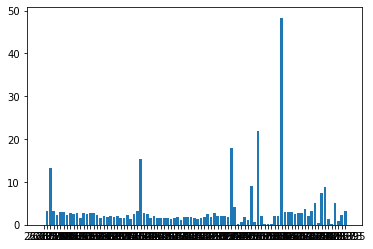

In [45]:
print(test)
import matplotlib.pyplot as plt
print("")
print("")
print("")
print("")
print("")
print(test.values())


plt.bar(range(len(test)), list(test.values()), align='center')
plt.xticks(range(len(test)), list(test.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.keys(), align='center')  # python 2.x
# plt.xticks(ran, D.values())  # in python 2.x

plt.show()


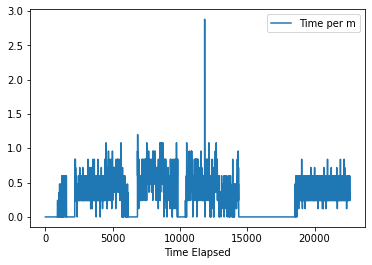

In [46]:
ax = data.plot(x='Time Elapsed', y='Time per m')
#data.plot(ax=ax, x = 'Time Elapsed', y  = "WOBA (ton)")
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)

In [47]:
print(empty_array)

[]


NameError: name 'python' is not defined